In [1]:
# We define the data transformations and loaders to load the images and their corresponding
# labels from the training folder. We use the Adam optimizer and cross-entropy loss function for training.
# Finally, we train the model for 10 epochs and save the model weights.
# The training data is loaded using PyTorch's DataLoader, and the model is trained using the Adam optimizer and
# cross-entropy loss. The trained model is then saved to a file for later use.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt

import numpy as np

from model import GenderClassifier

In [5]:
# Define the data transformations and loaders
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_set = datasets.ImageFolder('mfc_dataset_train_test/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=False)
classes = train_loader.dataset.classes

device = ('cuda' if torch.cuda.is_available() else 'cpu')

Feature batch shape: torch.Size([32, 3, 12, 98])
Labels batch shape: torch.Size([32])


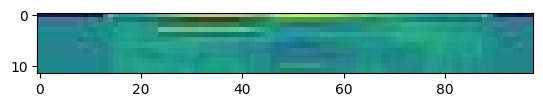

Label: 0 = female


In [6]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = np.einsum('cxy->xyc', train_features[0])
plt.imshow(img)
plt.show()
label = 0
print(f"Label: {label} = {classes[label]}")

In [25]:
def run_and_save_model(num_epochs, lr):
    print(f'Running model with {num_epochs} epochs, learning rate {lr}')

    # Initialize the model, loss function, and optimizer
    model = GenderClassifier().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train the model
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # Save the model
    torch.save(model.state_dict(), f'saved_model/weights_{num_epochs}_{lr}.pth')

In [26]:
for epochs in [5, 10]:
    for lr in [0.1, 0.01, 0.001]:
        run_and_save_model(epochs, lr)

Running model with 5 epochs, learning rate 0.1
Epoch 1, Loss: 46066.358215332606
Epoch 2, Loss: 109834.44823484984
Epoch 3, Loss: 5.9049184135424575
Epoch 4, Loss: 0.44834160828626696
Epoch 5, Loss: 0.4255729044866436
Running model with 5 epochs, learning rate 0.01
Epoch 1, Loss: 7.73413832442829
Epoch 2, Loss: 4.07014569535423
Epoch 3, Loss: 0.9939096380676172
Epoch 4, Loss: 0.7102377264977644
Epoch 5, Loss: 0.688475071717375
Running model with 5 epochs, learning rate 0.001
Epoch 1, Loss: 0.38760349041002073
Epoch 2, Loss: 0.6570040906596722
Epoch 3, Loss: 0.8608561529340549
Epoch 4, Loss: 0.8066570597906082
Epoch 5, Loss: 0.7270302599230514
Running model with 10 epochs, learning rate 0.1
Epoch 1, Loss: 46733.3678700604
Epoch 2, Loss: 166624.82100650677
Epoch 3, Loss: 11.504931243389224
Epoch 4, Loss: 0.7503417594497428
Epoch 5, Loss: 0.42504095195155867
Epoch 6, Loss: 0.41967781520888997
Epoch 7, Loss: 0.41865852698549844
Epoch 8, Loss: 0.4180785935504523
Epoch 9, Loss: 0.41769978617

In [27]:
def evaluate_model(num_epochs, lr):
    print(f'Testing model with {num_epochs} epochs, learning rate {lr}')

    # Test the model
    model = GenderClassifier().to(device)
    model.load_state_dict(torch.load(f'saved_model/weights_{num_epochs}_{lr}.pth'))
    model.eval()

    test_set = datasets.ImageFolder('mfc_dataset_train_test/test', transform=transform)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total))

In [28]:
for epochs in [5, 10]:
    for lr in [0.1, 0.01, 0.001]:
        evaluate_model(epochs, lr)

Testing model with 5 epochs, learning rate 0.1
Accuracy: 50.0 %
Testing model with 5 epochs, learning rate 0.01
Accuracy: 50.0 %
Testing model with 5 epochs, learning rate 0.001
Accuracy: 50.0 %
Testing model with 10 epochs, learning rate 0.1
Accuracy: 50.0 %
Testing model with 10 epochs, learning rate 0.01
Accuracy: 50.0 %
Testing model with 10 epochs, learning rate 0.001
Accuracy: 50.0 %
